# Parkinson Dataset

### 29 column; 1st subject id; 2-27 features; 28th output; 29th class info.
#### two data file: 1 for training and one for testing how? to get y_test

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.impute import SimpleImputer

#Importing two Student Perfomance Dataset Dataset
dataset=pd.read_csv("C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/regression-models/Parkinson Speech/data/train_data.txt",sep=",")
test_dataset=pd.read_csv("C:/Users/Manan/Desktop/Fall 2019/Machine Learning COMP6321/Project/Machine-Learning-Project/regression-models/Parkinson Speech/data/test_data.txt",sep=",")
test_data = pd.DataFrame(test_dataset)

data = pd.DataFrame(dataset)
X_train = data.iloc[:, 1:28].values
Y_train = data.iloc[:, 28].values
X_testSet = test_data.iloc[:, 1:28].values
print(X_testSet.shape)
print(dataset)

(167, 27)
       1  1.488  0.000090213    0.9  0.794  2.699   8.334  0.779  4.517  \
0      1  0.728     0.000038  0.353  0.376  1.059   5.864  0.642  2.058   
1      1  1.220     0.000074  0.732  0.670  2.196   8.719  0.875  4.347   
2      1  2.502     0.000123  1.156  1.634  3.469  13.513  1.273  5.263   
3      1  3.509     0.000167  1.715  1.539  5.145   9.112  1.040  3.102   
4      1  2.470     0.000126  1.358  1.341  4.075  10.696  1.256  5.262   
...   ..    ...          ...    ...    ...    ...     ...    ...    ...   
1034  40  5.127     0.000398  2.721  2.510  8.162   9.846  0.965  4.593   
1035  40  1.757     0.000133  0.808  0.690  2.425   7.571  0.740  2.720   
1036  40  2.912     0.000226  1.141  1.266  3.423  15.489  1.456  6.433   
1037  40  3.788     0.000275  1.786  1.484  5.359  15.702  1.367  6.374   
1038  40  1.809     0.000149  0.680  0.843  2.040   7.881  0.782  2.690   

       4.609  ...  187.576   160   159  0.006064725  0.000416276       0  0.1  \
0      3

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1039 entries, 0 to 1038
Data columns (total 29 columns):
1              1039 non-null int64
1.488          1039 non-null float64
0.000090213    1039 non-null float64
0.9            1039 non-null float64
0.794          1039 non-null float64
2.699          1039 non-null float64
8.334          1039 non-null float64
0.779          1039 non-null float64
4.517          1039 non-null float64
4.609          1039 non-null float64
6.802          1039 non-null float64
13.551         1039 non-null float64
0.905905       1039 non-null float64
0.119116       1039 non-null float64
11.13          1039 non-null float64
166.533        1039 non-null float64
164.781        1039 non-null float64
10.421         1039 non-null float64
142.229        1039 non-null float64
187.576        1039 non-null float64
160            1039 non-null int64
159            1039 non-null int64
0.006064725    1039 non-null float64
0.000416276    1039 non-null float64
0          

In [11]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.0, random_state = 0)

In [16]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_testSet)

In [19]:
# Model Accuracy
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

#Defining kernel for GaussianProcessRegressor
#kernel=None would take less time to train, but would give less accuracy
kernel = DotProduct() + WhiteKernel()

names = ['SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor','GaussianProcessRegressor','LinearRegression','MLPRegressor']
models = [SVR(gamma='scale', C=1.0, epsilon=0.2),
          DecisionTreeRegressor(random_state=0),
          RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100),
          AdaBoostRegressor(random_state=0, n_estimators=100),
          GaussianProcessRegressor(kernel=kernel,random_state=0),
          LinearRegression(),
          MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam')]

accuracy= np.zeros(7)

for counter, model in enumerate(models):
    model.fit(X_train, Y_train)
    Y_pred=model.predict(X_test)
    accuracy[counter] = r2_score(Y_train, Y_pred)*100
    print("Accuracy for " + names[counter] + ":",accuracy[counter])

ValueError: Found input variables with inconsistent numbers of samples: [1039, 167]

Text(0.5, 1.0, 'Wine Quality Dataset model accuracy')

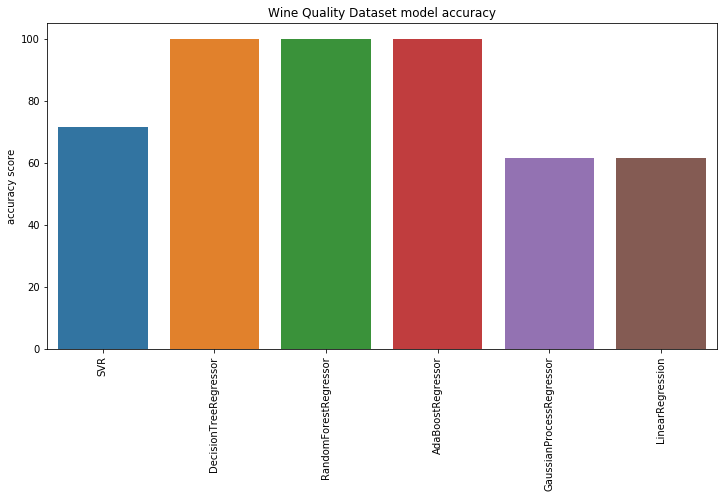

In [7]:
#Comparision graph between all models
import seaborn as sns
y_pos = np.arange(len(names))
heights = [accuracy[0],accuracy[1],accuracy[2],accuracy[3],accuracy[4],accuracy[5],accuracy[6]]

fig, ax=plt.subplots(1,1,figsize=(12,6))

plt.xticks(rotation='90')
sns.barplot(x=names, y=heights)
plt.ylabel('accuracy score')
plt.title('Parkinson speech Dataset model accuracy')